In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['rejectPaperDetails_2018.xlsx', 'acceptrejectPaperDetails_2017.xlsx', 'acceptedPaperDetails_2018.xlsx']


In [8]:
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    m = np.mean(score)
    s = np.std(score)
    return score,m,s



In [9]:
# reading 2017 scores
Accept_2017=pd.read_excel('../input/acceptrejectPaperDetails_2017.xlsx',sheet_name="Accept");
Reject_2017=pd.read_excel('../input/acceptrejectPaperDetails_2017.xlsx',sheet_name="Reject");
Scores_2017=pd.read_excel('../input/acceptrejectPaperDetails_2017.xlsx',sheet_name="Scores");

# adding results and mean score attribute
Accept_2017.drop(['Unnamed: 1'],axis=1,inplace=True)
Accept_2017["result"]=pd.Series(np.zeros(len(Accept_2017),dtype=float)) 
Accept_2017["mean"]=pd.Series(np.zeros(len(Accept_2017),dtype=float)) 
Accept_2017.info()
Reject_2017.drop(['Unnamed: 1'],axis=1,inplace=True)
Reject_2017["result"]=pd.Series(np.ones(len(Reject_2017),dtype=float)) 
Reject_2017["mean"]=pd.Series(np.zeros(len(Reject_2017),dtype=float)) 
Reject_2017.info()

# merging the table with common submission ID
result_rej = pd.merge(Scores_2017,Reject_2017[['Submission ID','Title','Abstract','result','mean']]
                 ,on='Submission ID')
result_acc = pd.merge(Scores_2017,Accept_2017[['Submission ID','Title','Abstract','result','mean']]
                 ,on='Submission ID')

# appending the accepted scores and rejected scores
data_2017 = result_acc.append(result_rej, ignore_index=True)
#type(result_2017.sort_values[])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
Submission ID    794 non-null int64
Title            794 non-null object
Abstract         793 non-null object
result           794 non-null float64
mean             794 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 31.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 5 columns):
Submission ID    677 non-null int64
Title            677 non-null object
Abstract         677 non-null object
result           677 non-null float64
mean             677 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 26.5+ KB


In [10]:
for i in data_2017.index:
    #print(i)
    temp = data_2017.iloc[i]["Scores"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    data_2017.at[i, 'mean'] = m
    

data_2017 = data_2017.fillna("")
data = data_2017.sort_values(by=['mean'])
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 1412 to 780
Data columns (total 6 columns):
Submission ID    1471 non-null int64
Scores           1471 non-null object
Title            1471 non-null object
Abstract         1471 non-null object
result           1471 non-null float64
mean             1471 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 80.4+ KB


,Submission ID,Scores,Title,Abstract,result,mean
641,1409,4.95 5.65 5.70 6,What do babies hear? Analyses of child- and ad...,Child-directed speech is argued to facilitate ...,0.0,5.5750
664,1452,5.05 5.60 5.95 6,Tacotron: Towards End-To-End Speech Synthesis,A text-to-speech synthesis system typically co...,0.0,5.6500
65,137,5.15 5.80 5.80 5.85,A Generative Model for Score Normalization in ...,We propose a theoretical framework for thinkin...,0.0,5.6500
500,1111,4.90 5.80 6 6,The ASVspoof 2017 Challenge: Assessing the Lim...,The ASVspoof initiative was created to promote...,0.0,5.6750
780,1746,5.05 5.90 6 6,"Effects of Talker Dialect, Gender & Race Diffe...",This project compares the accuracy of two auto...,0.0,5.7375


In [14]:
input_scores=np.zeros((len(data),6)) 
output_class=np.zeros((len(data),))
count = 0
for i in range(len(data)):
    #print(i)
    temp = data.iloc[i]["Scores"]
    result = data.iloc[i]["result"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    input_scores[count,0:len(score)]=score
    output_class[count] = result
    count+=1
    

In [41]:
print(input_scores[1366])
print(output_class[1366])

[4.9  4.95 4.95 5.   0.   0.  ]
0.0


In [102]:
def scores_covertion(X_scores):
    X_new = np.zeros((len(X_scores),11))
    count = 0
    addon = 0
    for i in X_scores:
        
        X_new[count,addon+0] = i[i.nonzero()].mean()/6
        X_new[count,addon+1] = i[i.nonzero()].std()/6
        temp = np.ptp(i[i.nonzero()])
        if(temp == 0):
            X_new[count,addon+2] = np.max(X_new[:,addon+2])
        else:
            X_new[count,addon+2] = 6*X_new[count,addon+0]*(1.0/(temp))
        X_new[count,addon+3] = np.max(i[i.nonzero()])/6
        X_new[count,addon+4] = np.min(i[i.nonzero()])/6
        a = i
        X_new[count,addon+5] = np.sum(np.logical_and(a>0.1, a<=1))
        X_new[count,addon+6] = np.sum(np.logical_and(a>1, a<=2))
        X_new[count,addon+7] = np.sum(np.logical_and(a>2, a<=3))
        X_new[count,addon+8] = np.sum(np.logical_and(a>3, a<=4))
        X_new[count,addon+9] = np.sum(np.logical_and(a>4, a<=5))
        X_new[count,addon+10] = np.sum(np.logical_and(a>5, a<=6))
        
        count +=1
    return X_new

In [103]:
X_2017 = scores_covertion(input_scores)
print(X_2017.shape)
# np.mean(X_2017,axis=0)
mean_2017 = np.mean(X_2017[:,2],axis = 0)
std_2017 = np.std(X_2017[:,2],axis = 0)

(1471, 11)


In [104]:
X_2017[:,2] = (X_2017[:,2]-mean_2017)/std_2017

#m_2017 = np.mean(X_2017[:,2])
#s_2017 = np.std(X_2017[:,2])



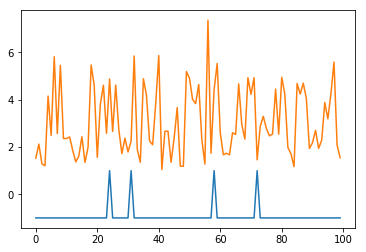

In [88]:
plt.plot((output_class[1000:1100]-0.5)*2)
plt.plot(X_2017[1000:1100,2])
plt.show()

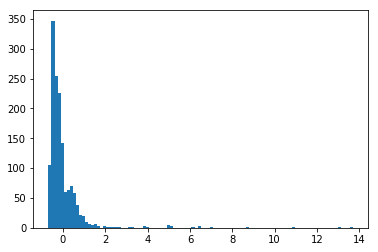

In [67]:
plt.hist(X_2017[:,2], bins=100)
#plt.hist(X_new[750:-1,7], bins=100)
plt.show()

In [94]:
Accept_2018=pd.read_excel('../input/acceptedPaperDetails_2018.xlsx');
Reject_2018=pd.read_excel('../input/rejectPaperDetails_2018.xlsx');

Accept_2018["result"]=pd.Series(np.zeros(len(Accept_2018),dtype=float)) 
Accept_2018["mean"]=pd.Series(np.zeros(len(Accept_2018),dtype=float)) 
#Accept_2018.info()
Reject_2018["result"]=pd.Series(np.ones(len(Reject_2018),dtype=float)) 
Reject_2018["mean"]=pd.Series(np.zeros(len(Reject_2018),dtype=float)) 
#Reject_2018.info()


data_2018 = Accept_2018.append(Reject_2018, ignore_index=True)
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    m = np.mean(score)
    s = np.std(score)
    return score,m,s

for i in data_2018.index:
    #print(i)
    temp = data_2018.iloc[i]["Scores"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    data_2018.at[i, 'mean'] = m
    
data_2018 = data_2018.fillna("")
Data_2018 = data_2018.sort_values(by=['mean'])
#Data_2018.info()
#Data_2018.tail()

input_scores_2018=np.zeros((len(Data_2018),6)) 
output_class_2018=np.zeros((len(Data_2018),))
count = 0
for i in range(len(Data_2018)):
    #print(i)
    temp = Data_2018.iloc[i]["Scores"]
    result = Data_2018.iloc[i]["result"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    input_scores_2018[count,0:len(score)]=score
    output_class_2018[count] = result
    count+=1
    

In [95]:
print(input_scores_2018.shape)
print(output_class_2018.shape)

(1331, 6)
(1331,)


In [96]:
X_2018 = scores_covertion(input_scores_2018)
print(X_2018.shape)
# np.mean(X_2017,axis=0)
mean_2018 = np.mean(X_2018[:,2],axis = 0)
std_2018 = np.std(X_2018[:,2],axis = 0)

(1331, 11)


In [106]:
X_2018[:,2] = (X_2018[:,2]-mean_2017)/std_2017
np.mean(X_2018,axis=0)

array([ 0.68017865,  0.11653894, -0.82314415,  0.82209492,  0.52795517,
        0.00601052,  0.18031555,  0.55146506,  0.82870023,  1.47407964,
        0.87678437])

In [105]:
np.mean(X_2017,axis=0)

array([ 6.57026399e-01,  1.22192446e-01, -4.31711468e-17,  8.08050079e-01,
        4.99331521e-01,  6.79809653e-04,  1.44799456e-01,  6.51937458e-01,
        1.14751869e+00,  1.43643780e+00,  5.25492862e-01])

In [107]:
X_2017[0]

array([0.25833333, 0.03061862, 0.13585115, 0.29166667, 0.21666667,
       0.        , 4.        , 0.        , 0.        , 0.        ,
       0.        ])

In [108]:
X_2018[0]

array([ 0.19791667,  0.0180422 , -0.72470056,  0.20833333,  0.16666667,
        1.        ,  3.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [112]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_2017, output_class)
pred =regr.predict(X_2018)

In [128]:
score_calculator = np.zeros((len(X_2018),))
for j in np.arange(0,20):
    score_calculator = np.zeros((len(X_2018),))
    for i in range(len(pred)):
        if(pred[i]>(j/10)-1):
            score_calculator[i] = 1
    print(str(j/10)+' '+str(accuracy_score(output_class_2018, score_calculator)))

0.0 0.43726521412471825
0.1 0.43726521412471825
0.2 0.43726521412471825
0.3 0.43726521412471825
0.4 0.43726521412471825
0.5 0.43726521412471825
0.6 0.439519158527423
0.7 0.4530428249436514
0.8 0.5041322314049587
0.9 0.6040570999248686
1.0 0.667167543200601
1.1 0.7468069120961683
1.2 0.8204357625845229
1.3 0.8670172802404207
1.4 0.8797896318557475
1.5 0.8602554470323065
1.6 0.8151765589782118
1.7 0.768595041322314
1.8 0.7205108940646131
1.9 0.67618332081142


In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(X_2017, output_class)
pred =clf.predict(X_2018)

In [133]:
print(str(accuracy_score(output_class_2018, pred)))

0.8850488354620586


In [138]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C=2)
clf_svm.fit(X_2017, output_class)
pred =clf_svm.predict(X_2018)
print(str(accuracy_score(output_class_2018, pred)))

0.8865514650638617


In [137]:
clf_svm = svm.SVC(kernel='rbf', C=1)
clf_svm.fit(X_2017, output_class)
pred =clf_svm.predict(X_2018)
print(str(accuracy_score(output_class_2018, pred)))

0.836213373403456


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [145]:
clf_svm = svm.SVC(kernel='poly', C=1)
clf_svm.fit(X_2017, output_class)
pred =clf_svm.predict(X_2018)
print(str(accuracy_score(output_class_2018, pred)))

0.8842975206611571


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [154]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=7)
clf_neigh.fit(X_2017, output_class)
pred =clf_neigh.predict(X_2018)
print(str(accuracy_score(output_class_2018, pred)))

0.864763335837716


In [160]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_2017, output_class)
pred = model.predict(X_2018)

In [161]:
print(str(accuracy_score(output_class_2018, pred)))

0.8820435762584523
